In [7]:
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from spectrum import *

## Removing autocorrelation from the time series 

Not many people knows that pearson's correlation between auto-correlated time series result in spurious correlations. To solve this problem we need to uses the linear correlation between regressed time series using autoregressive models (AR models).

The problem with removing autocorrelation is that we lose the frenquecy information about the signal. 

### Using Air Passengers data from Kaggle

https://www.kaggle.com/datasets/rakannimer/air-passengers

In [111]:
data = pd.read_csv("AirPassengers.csv")
data = pd.DataFrame(data)
series = data['#Passengers']

In [112]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


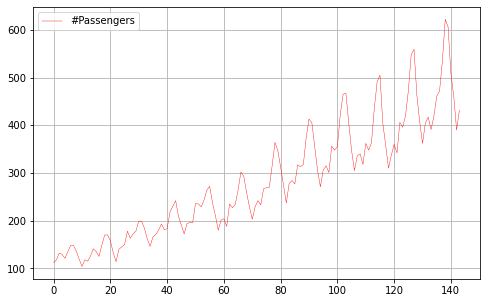

In [105]:
data.plot(color="red",linewidth=0.4, figsize=(8,5))
plt.grid()
plt.show()

### Checking the autocorrelation

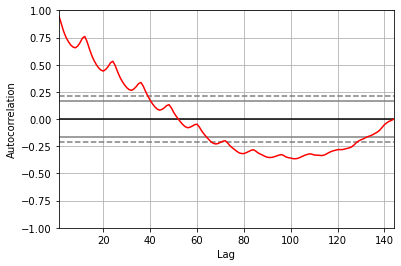

In [88]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(series, c="red")
plt.show()

### Removing part of the auto-correlation with Pre-whitening (Autoregressive model)

In [106]:
def remove_autocorrelation(data):
    # Remove autocorrelation from a matrix
    
    n = len(data) # time series lenght
    Pmax = 100

    new_ts_matrix = np.zeros(((n-100),10,10))
    BIC = np.zeros(Pmax)
    
    for i in range(len(data[0])):
        for j in range(len(data[0])):
            for P in range(1,Pmax):

                #autoregressive model
                [ar, var, reflec] = aryule(data[:,i,j], P)

                #param ajust
                param = np.concatenate((np.array([1]),ar))

                # filter
                vt = signal.lfilter(param,[1], data[:,i,j], axis=0)

                # maximum likelihood 
                LL = -1*(n/2)*log( 2*np.pi*np.mean(vt**2))+ (-0.5*(1/np.mean(vt**2))*sum(vt**2))

                # Baysian information
                BIC[P] = -2*LL+P*log(n)

            # minimum BIC    
            optimal_P = np.where( BIC == min(BIC))

            #autoregressive model
            [ar, var, reflec] = aryule(data[:,i,j], int(optimal_P[0]))

            #param ajust
            param = np.concatenate((np.array([1]),ar))

            # filter
            vt = signal.lfilter(param,[1], data[:,i,j], axis=0)

            # Remove border effects from inicial points
            vt = vt[Pmax:]
            
            #New matrix with the time series without correlation
            new_ts_matrix[:,i,j] = vt
            
    return new_ts_matrix

In [107]:
data = np.zeros((len(series), 1,1))
data[:,0,0] = series.values.reshape(len(series))
new_time_series = remove_autocorrelation(data)


### The result of the pre-whitening is indeed less autocorrelated

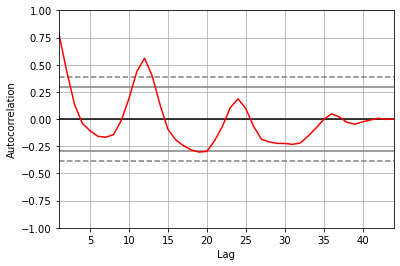

In [91]:
from pandas.plotting import autocorrelation_plot
plt.figure(5)
autocorrelation_plot(new_time_series[:,0,0], c="red")
plt.show()

#### Now we can decently correlate these time series with another




## Other example

### Using Spin Time Series from 2D Ising Model for metal plates. But you can use any time from any context that you like

In [114]:
data = np.loadtxt("avg_model2.3.txt")
data = data.reshape((2000,10,10))

Imagem from one time step 

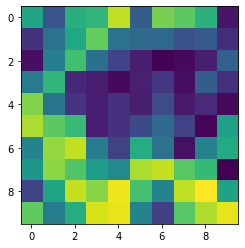

In [115]:
plt.imshow(data[100,:,:])

#### The Ising model data is constructed using Markov Chain. Hence, it must be highly autocorrelated.

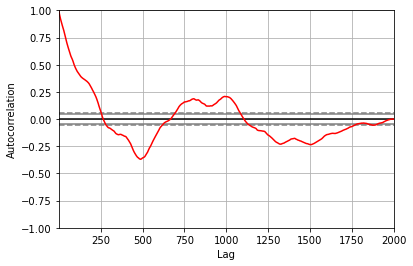

In [116]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(data[:,0,0], c="red")
plt.show()

#### Removing autocorrelation

In [117]:
new_time_series = remove_autocorrelation(data)



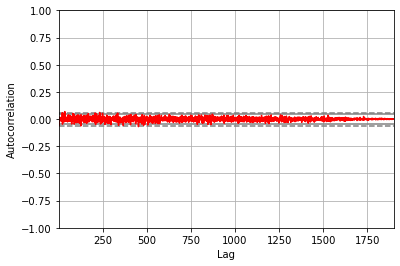

In [119]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(new_time_series[:,0,0], c="red")
plt.show()

### Because the model is simulated by a markov chain all the autocorrelation is vanished and the signal left is just numerical noise